
# SVM model and evaluation of features
Using the extracted features from create_features_from_PC-GITA.py

### Imports

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 

from functions import *
from possible_data_to_extract import *
from constants import *


# Setup for the experiment 

### Ensuring reproducibility in data splitting

In [3]:
seed_number = 42
np.random.seed(seed_number) # To make sure np.random.shuffle() used is reproduceble.

### Choose features

In [4]:
# Choosing which featuers we want to extract // Look in possible_features_to_extract.md and constants to see your choices. 
choosen_features = {}
choosen_features["Articulation"] = articulation_all_features
choosen_features["Phonation"] = phonation_all_features
choosen_features["Prosody"] = prosody_all_features


# Always bring along the id
choosen_features["Articulation"].append('id') # id is the same for Articulation, Phonation and Prosody so only use one. 

### Choose utterances

In [5]:
# Choosing which data we want to extract // Look in possible_data_to_extract.py to see your choices and import from there. 
# Can use all of one type of data alone, can use different type of data together, can use only one type for for example sentence and etc --> combine as wanted. 

# All utterances:
hc_paths = hc_paths_continuous_speech
pd_paths = pd_paths_continuous_speech


# Method to use different types of data together: 
# hc_paths = hc_paths_ddk + hc_paths_words + hc_paths_sentences + hc_paths_monologue
# pd_paths = pd_paths_ddk + pd_paths_words + pd_paths_sentences + pd_paths_monologue

# Method to get only some examples out:(can also go to the possible_data_to_extract file and change the values there. 
# hc_paths = [hc_paths[3]]
# pd_paths = [pd_paths[3]]

# Can also be defined directly here like this: 
#hc_paths = ["PC-GITA-static-features/sentences/micasa/sin_normalizar/HC", "PC-GITA-static-features/sentences/omar/sin_normalizar/HC" ] # Can also only be one 
#pd_paths = ["PC-GITA-static-features/sentences/micasa/sin_normalizar/PD", "PC-GITA-static-features/sentences/omar/sin_normalizar/PD" ] # Can also only be one


base_path = "PC-GITA-static-features" # Folder name for where we have the features saved to
hc_paths = extend_paths(hc_paths, base_path)
pd_paths = extend_paths(pd_paths, base_path)


### Extracting certain data if wanted
If want smaller amount of data from the datatype, for example only vowels of type "A" from vowels we can fix that here

In [6]:

# Choose which data you want to use here
    # for Vowels, add a / first (for ex. /A)
    # If you want all data, use [""]
data_types = [""] # Example: ["/A", "viaje"]  

hc_paths = find_certain_paths_from_all_paths(hc_paths, data_types)
pd_paths = find_certain_paths_from_all_paths(pd_paths, data_types)


# Data processing 

### Extract chosen features from folder created by create_features_from_PC_GITA

In [7]:
features = {}
features["HC"] = get_features(hc_paths, choosen_features)
features["PD"] = get_features(pd_paths, choosen_features)

### Add metadata 
- Add key for metadata to the features, so that it can be sorted as wanted. 

In [8]:
metadata_path = os.path.join(personal_path_to_PC_GITA,'PCGITA_metadata.xlsx')
metadata = pd.read_excel(metadata_path)

metadata_columns = ["SEX", "AGE", "UPDRS", "UPDRS-speech", "H/Y", "time after diagnosis"]

features["HC"] = add_metadata_columns(features["HC"], metadata, metadata_columns)
features["PD"] = add_metadata_columns(features["PD"], metadata, metadata_columns)

metadata_columns.append("id") # Will be used later on to remove all metadata and then also want to remove id. 


# Evaluate the data 

### Plot features 

In [9]:
# Define features to plot (ideal to not be all the features we run the model for because that takes some time )
features_to_plot_names = ["avg Jitter","avg Shimmer" ]  

features_to_plot = {}
features_to_plot["HC"] = features["HC"].copy()
features_to_plot["PD"] = features["PD"].copy()

if features_to_plot_names:
    features_to_plot["HC"] = features["HC"].loc[:, features_to_plot_names + metadata_columns]
    features_to_plot["PD"] = features["PD"].loc[:, features_to_plot_names + metadata_columns]
    print("Adjusterd the features")
        
# Make seperate data for male and female for plotting 
features_male = {}
features_female =  {}

for key in features_to_plot.keys(): 
    features_male[key] = features_to_plot[key][features_to_plot[key]['SEX'] == 'M']
    features_female[key] = features_to_plot[key][features_to_plot[key]['SEX'] == 'F']

# Possible to do data manipulation based on age and the other metadata columns as well. 
    

Adjusterd the features


 
The average value and std for avg Jitter is: 
   Over the 900 HC the average was 3.33 and the standard deviation was 0.88
   Over the 900 PD the average was 3.42 and the standard deviation was 1.09


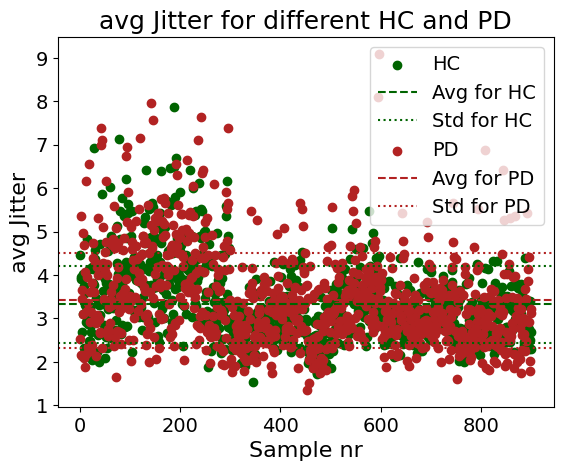

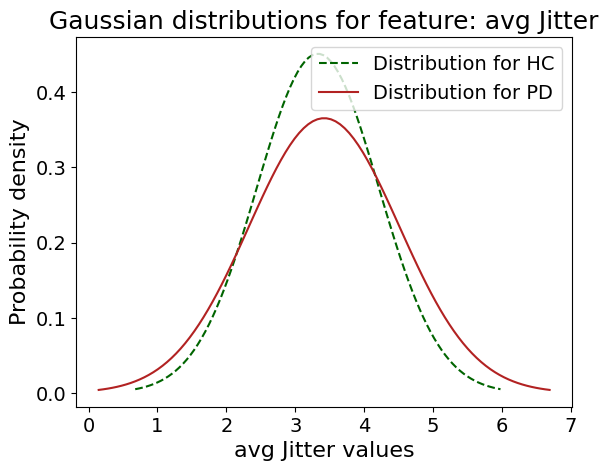

 
The average value and std for avg Shimmer is: 
   Over the 900 HC the average was 9.13 and the standard deviation was 3.39
   Over the 900 PD the average was 8.17 and the standard deviation was 2.55


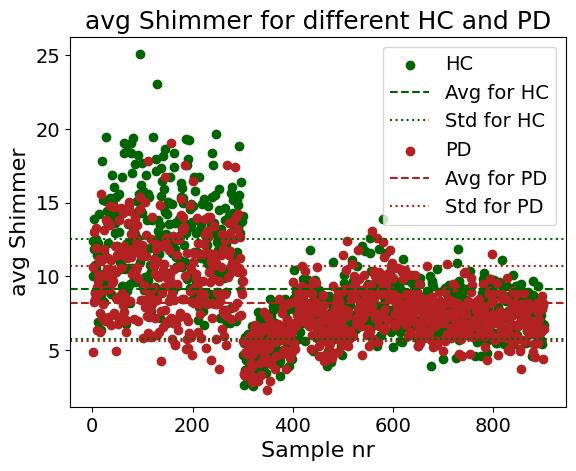

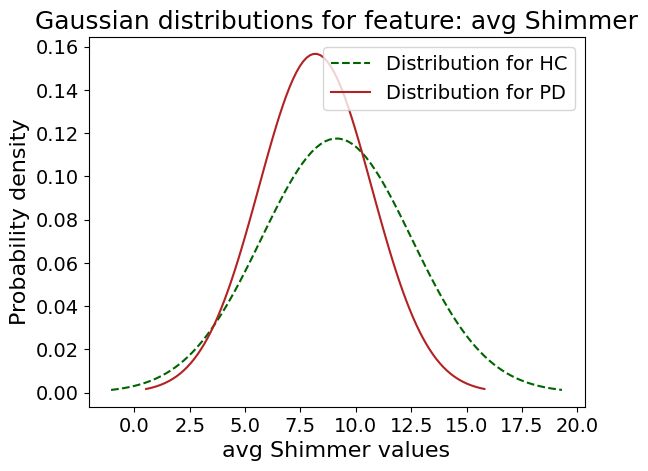

In [11]:
# This plotting works better if you only have one utterance type defined. (t.d one specific vowel/sentence). 
# Not recommended to plot if you have a lot of features, it will take time and might crash.  

want_plots = True # Change to True if you want plots. 
if want_plots: 
    # PD vs HC: Shows every utterence type after each other. 
    plot_features([features_to_plot["HC"], features_to_plot["PD"]], ["HC", "PD"], [HC_color, PD_color], metadata_columns)

    # Male vs female: Shows first all healty and then all with PD. 
    features_f = pd.concat([features_female["HC"], features_female["PD"]])
    features_m = pd.concat([features_male["HC"], features_male["PD"]])
    # plot_features([features_f, features_m], ["female", "male"], ["pink", "skyblue"], metadata_columns)

In [14]:
# Only works if we have more than 1 feature to work with, and does not work for the metadata_columns
# feature_types = ["avg BBEon_1", "avg MFCCon_1"]
want_plots_together = False
if want_plots_together: 
    feature_types = [features["PD"].keys().to_list()[0], features["PD"].keys().to_list()[1]] # Can also use features_to_plot here. 
    plot_features_together(features, feature_types)

# Restructure data 
Choose a smaller amount of features to use: 

Usefull if you have a definition of features that is not divided into articulation, phonation and prosody. 

In [15]:
features_for_model =  SoAf_all_mean # Define some features if you want to remove some more features, look in constants for tips. 

if features_for_model:
    features_for_model = features_for_model + metadata_columns
    print("Features choosen: ", features_for_model)
    features["HC"] = features["HC"].loc[:, features_for_model]
    features["PD"] = features["PD"].loc[:, features_for_model]

Features choosen:  ['avg BBEon_1', 'avg BBEon_2', 'avg BBEon_3', 'avg BBEon_4', 'avg BBEon_5', 'avg BBEon_6', 'avg BBEon_7', 'avg BBEon_8', 'avg BBEon_9', 'avg BBEon_10', 'avg BBEon_11', 'avg BBEon_12', 'avg BBEon_13', 'avg BBEon_14', 'avg BBEon_15', 'avg BBEon_16', 'avg BBEon_17', 'avg BBEon_18', 'avg BBEon_19', 'avg BBEon_20', 'avg BBEon_21', 'avg BBEon_22', 'avg MFCCon_1', 'avg MFCCon_2', 'avg MFCCon_3', 'avg MFCCon_4', 'avg MFCCon_5', 'avg MFCCon_6', 'avg MFCCon_7', 'avg MFCCon_8', 'avg MFCCon_9', 'avg MFCCon_10', 'avg MFCCon_11', 'avg MFCCon_12', 'avg DMFCCon_1', 'avg DMFCCon_2', 'avg DMFCCon_3', 'avg DMFCCon_4', 'avg DMFCCon_5', 'avg DMFCCon_6', 'avg DMFCCon_7', 'avg DMFCCon_8', 'avg DMFCCon_9', 'avg DMFCCon_10', 'avg DMFCCon_11', 'avg DMFCCon_12', 'avg DDMFCCon_1', 'avg DDMFCCon_2', 'avg DDMFCCon_3', 'avg DDMFCCon_4', 'avg DDMFCCon_5', 'avg DDMFCCon_6', 'avg DDMFCCon_7', 'avg DDMFCCon_8', 'avg DDMFCCon_9', 'avg DDMFCCon_10', 'avg DDMFCCon_11', 'avg DDMFCCon_12', 'avg BBEoff_1', 

In [16]:
# Initialize lists to store samples, labels and metadata
values = []
labels = []
metadata = [] 

# Iterate through the feature dictionary
for label, value in features.items():
    metadata.extend(np.array(value[metadata_columns])) # Bring along metadata for future use
    value = np.array(value.drop(columns = metadata_columns))
    values.extend(value)  # Extend the features list with the samples for each label
    num_label = class_labels[label]
    labels.extend([num_label] * len(value))  # Add labels corresponding to each person

# Convert samples and labels to numpy arrays
num_features = len(values[0])
values = np.array(values).reshape(-1, num_features) # Values 
labels = np.array(labels)  # Labels 
metadata = np.array(metadata) # Metadata - to be used to know what data is wrong and correct classified 

# Remove nan values in features. Probably came because of some problem when extracting the features, got a warning with prosody. 
    # When not changing these the SVM model does not work, and the CNN model always predicts HC. 
print("Number of NaN values:", np.count_nonzero(np.isnan(values))) # Shows how many NaN values we have for each column. 
print("Total number of values from features: ", values.size)

values = np.nan_to_num(values, nan=0)
labels = np.nan_to_num(labels, nan=0)

Number of NaN values: 39
Total number of values from features:  235800


# SVM

### Training and testing split: 

In [17]:
# Split the data into training and testing sets (60% training, 40% testing)
train_data, test_data, train_labels, test_labels, train_metadata, test_metadata = train_test_split(values, labels, metadata, test_size=0.4, random_state=seed_number, stratify=labels)

# Standardize the data and remove num
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

### Grid search

In [18]:
# Grid search to experiment with different parameters, automatic does cross validation with 5 fold cross val so dont need a validation set. 
C = [0.0001, 0.001, 0.1, 1, 10] 
gamma = [0.0001, 0.001, 0.1, 1, 10, 100, 1000] 

In [25]:
# param_grid = {'C':C, 'gamma':gamma,'kernel': kernels}  Needs to du unnecessary computation for the linear one, works but method underneath is better. 
param_grid = [{'kernel': ['rbf'], 'gamma': gamma, 'C': C},  # RBF = Gaussian Radial Basis Function 
        {'kernel': ['linear'], 'C': C}]

grid = GridSearchCV(SVC(random_state=seed_number), param_grid, refit = True, verbose = 0) 
                # verbose controls how much is printed out, refit = True makes grid be a svm model fitted to the best result from the grid search
grid.fit(train_data, train_labels) 

# Print best parameter after tuning 
print(f"The best parameters after grid search is {grid.best_params_}, and therefore now our SVM model: {grid.best_estimator_}") 


The best parameters after grid search is {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, and therefore now our SVM model: SVC(C=10, gamma=0.001, random_state=42)


Training Accuracy: 86.76%
Test Accuracy: 76.94%
Sensitivity (Recall of PD): 78.33%
Specificity (Recall of HC): 75.56%


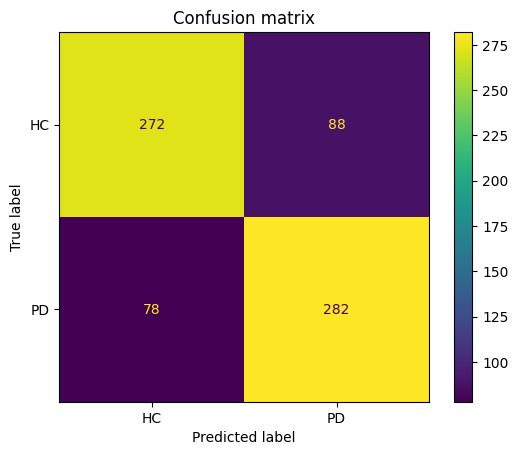


Classification Report:
              precision    recall  f1-score   support

          HC       0.78      0.76      0.77       360
          PD       0.76      0.78      0.77       360

    accuracy                           0.77       720
   macro avg       0.77      0.77      0.77       720
weighted avg       0.77      0.77      0.77       720



In [22]:
# Evaluation og grid search 

train_predictions = grid.predict(train_data)
accuracy_train = accuracy_score(train_labels, train_predictions)
print(f"Training Accuracy: {accuracy_train * 100:.2f}%")

test_predictions = grid.predict(test_data)
accuracy_test = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

# Calculate and print out sensitivity and specificity
_ = sensitivity_and_specificity(y_true=test_labels, y_pred = test_predictions)

# Calculate and print out confusion matrix
calculate_confusion_matrix(y_true=test_labels, y_pred = test_predictions)


# Print out classification report
print_classification_report(y_true=test_labels, y_pred=test_predictions)

### Model based on best result from the grid search 

Model without grid search --> can be defined to be the best model from the grid search like here, but can also be tested with different values. 


Training Accuracy: 86.76%
Test Accuracy: 76.94%
Sensitivity (Recall of PD): 78.33%
Specificity (Recall of HC): 75.56%


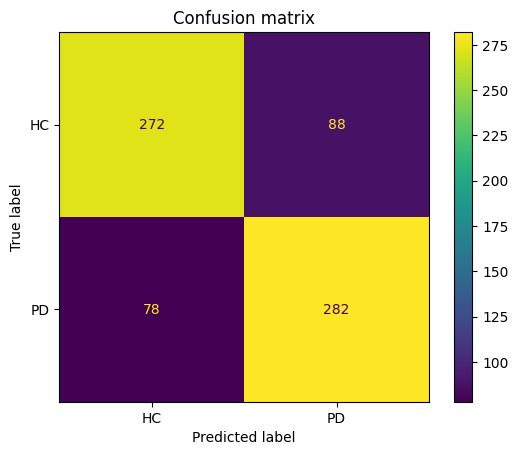


Classification Report:
              precision    recall  f1-score   support

          HC       0.78      0.76      0.77       360
          PD       0.76      0.78      0.77       360

    accuracy                           0.77       720
   macro avg       0.77      0.77      0.77       720
weighted avg       0.77      0.77      0.77       720

 
This is data for fold number 1: 
Fold Test Accuracy: 77.78%
Confusion Matrix:
[[71 19]
 [21 69]]
 
This is data for fold number 2: 
Fold Test Accuracy: 78.33%
Confusion Matrix:
[[75 15]
 [24 66]]
 
This is data for fold number 3: 
Fold Test Accuracy: 77.22%
Confusion Matrix:
[[73 17]
 [24 66]]
 
This is data for fold number 4: 
Fold Test Accuracy: 78.33%
Confusion Matrix:
[[69 21]
 [18 72]]
 
This is data for fold number 5: 
Fold Test Accuracy: 77.22%
Confusion Matrix:
[[71 19]
 [22 68]]
 
This is data for fold number 6: 
Fold Test Accuracy: 81.67%
Confusion Matrix:
[[77 13]
 [20 70]]
 
This is data for fold number 7: 
Fold Test Accuracy: 

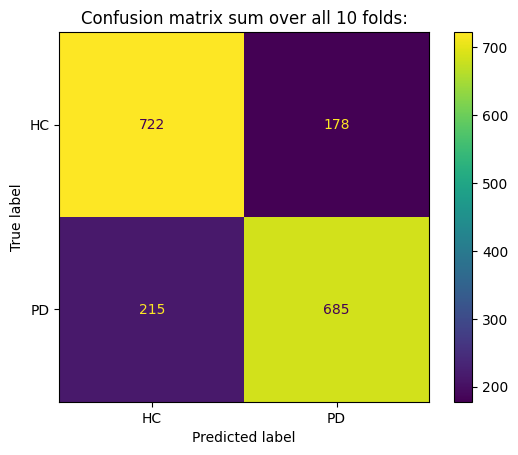

In [21]:
# Gamma is only a kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’, so remove it when linear. 

kernel_best ='rbf' 
C_best = 10
gamma_best = 0.001
svm_model = SVC(kernel=kernel_best, C=C_best, gamma = gamma_best, random_state=seed_number)

svm_model.fit(train_data, train_labels)

train_predictions = svm_model.predict(train_data)
accuracy_train = accuracy_score(train_labels, train_predictions)
print(f"Training Accuracy: {accuracy_train * 100:.2f}%")

# Testing the model: 
test_predictions = svm_model.predict(test_data)
accuracy_test = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

# Calculate and print out sensitivity and specificity
_ = sensitivity_and_specificity(y_true=test_labels, y_pred = test_predictions)

# Calculate and print out confusion matrix
calculate_confusion_matrix(y_true=test_labels, y_pred = test_predictions)

# Print out classification report
print_classification_report(y_true=test_labels, y_pred=test_predictions)

# 5 fold cross val for the best chooise of parameters:
x_fold_cross_val(x=values, y=labels, model=svm_model, num_folds=10, random_state=seed_number)


We have 268 women and 286 men in the 554 correctly classified people. 
We have 93 women and 73 men in the 166 wrongly classified people. 


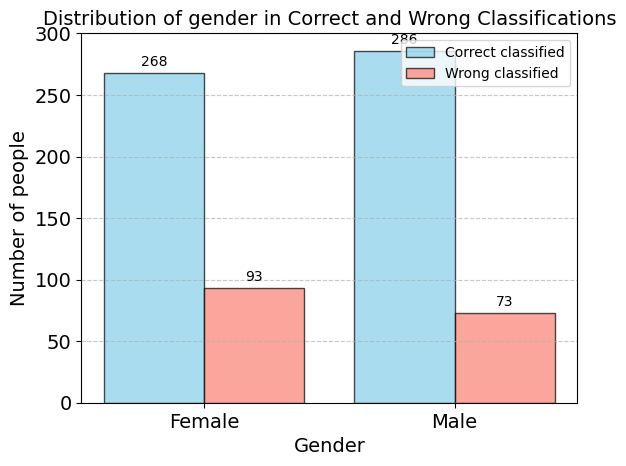

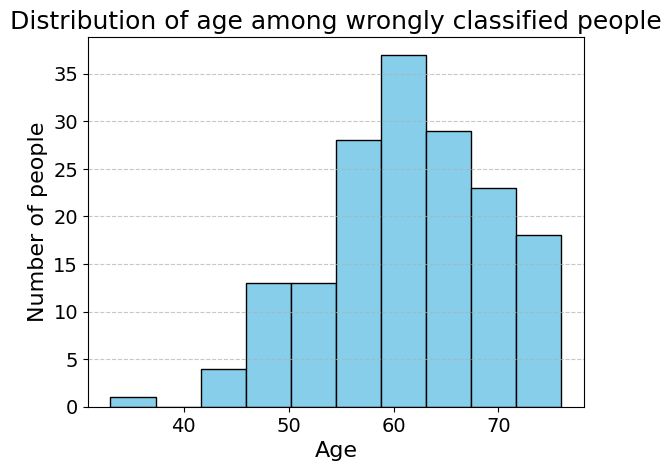

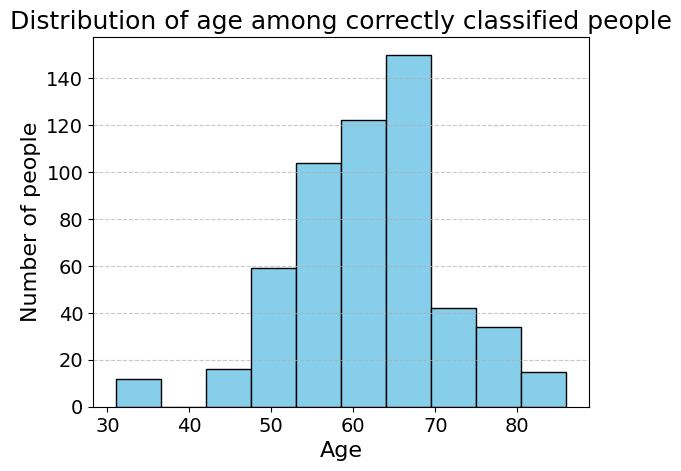

In [23]:
# Print plots and data using metadata
evaluate_metadata(test_labels=test_labels, y_pred=test_predictions, test_metadata=test_metadata, metadata_columns=metadata_columns)